In [40]:
import numpy as np
import random

In [1]:
for i in range(1,11):
  print(i)

1
2
3
4
5
6
7
8
9
10


In [3]:
[i for i in range(1,11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
class cust():
  def __init__(self, id, flavor, temp):
    self.id = id
    self.flavor = flavor
    self.temp = temp

  def method():
    

In [35]:
a = np.random.poisson(40, 1000000)

In [7]:
c = cust(1, "arebica", 50)

In [41]:
flav = ['Arebica', 'Columbia']
print(random.choices(flav, weights=(60, 40), k=1))

['Columbia']


In [44]:
customer = []
a = np.random.poisson(40, 10)

for i in range(1,11):
  c = cust(i, random.choices(flav, weights=(60, 40), k=1)[0], a[i-1])

  customer.append(c)

print(a)
customer

[31 31 40 40 42 47 43 30 47 42]


In [45]:
[i.flavor for i in customer]

['Columbia',
 'Arebica',
 'Arebica',
 'Columbia',
 'Columbia',
 'Arebica',
 'Arebica',
 'Columbia',
 'Columbia',
 'Columbia']

---

In [46]:
import pandas as pd

In [47]:
path = 'https://raw.githubusercontent.com/nelson-wu/employee-attrition-ml/master/WA_Fn-UseC_-HR-Employee-Attrition.csv'

df = pd.read_csv(path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [49]:
col_name = df.columns

In [50]:
col_name

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:
col = ['Age', 'Attrition', 'Gender', 'MonthlyIncome', 'OverTime', 'YearsAtCompany']
data = df[col]

In [55]:
data.head()

,Age,Attrition,Gender,MonthlyIncome,OverTime,YearsAtCompany
0,41,Yes,Female,5993,Yes,6
1,49,No,Male,5130,No,10
2,37,Yes,Male,2090,Yes,0
3,33,No,Female,2909,Yes,8
4,27,No,Male,3468,No,2


In [101]:
data.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [89]:
y = data['Attrition']
X = data.drop('Attrition', axis=1)

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le = LabelEncoder()

X['Gender'] = le.fit_transform(X['Gender'])
X['OverTime'] = le.fit_transform(X['OverTime'])
y = le.fit_transform(y.values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42)

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [172]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))

In [173]:
dt_cl = DecisionTreeClassifier(class_weight='balanced', max_depth=3)
dt_cl.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [174]:
y_pred = dt_cl.predict(X_test)

generate_model_report(y_test, y_pred)
print()

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

Accuracy =  0.7366255144032922
Precision =  0.27692307692307694
Recall =  0.5142857142857142
F1 Score =  0.36



array([[322,  94],
       [ 34,  36]])

In [175]:
text_representation = tree.export_text(dt_cl)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_4 <= 0.04
|   |   |--- feature_0 <= 0.35
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.35
|   |   |   |--- class: 0
|   |--- feature_4 >  0.04
|   |   |--- feature_2 <= 0.51
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.51
|   |   |   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_2 <= 0.10
|   |   |--- feature_0 <= 0.81
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.81
|   |   |   |--- class: 0
|   |--- feature_2 >  0.10
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0



In [176]:
from matplotlib import pyplot as plt


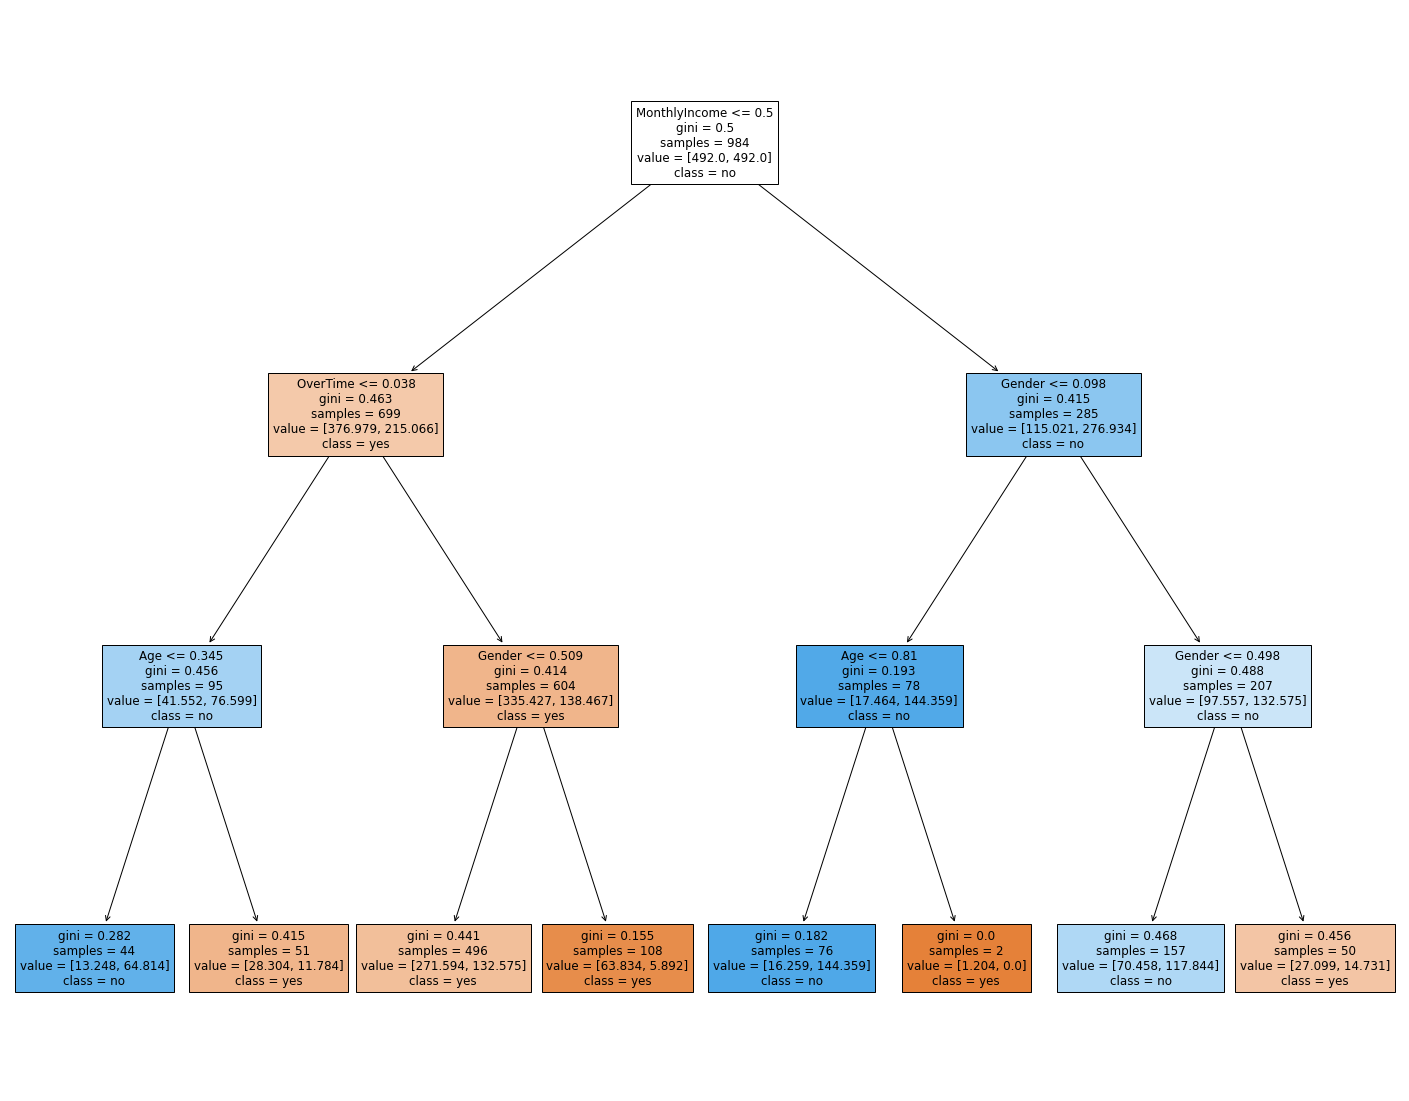

In [177]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_cl, 
                   feature_names=data.columns,  
                   class_names=['yes', 'no'],
                   filled=True)